# CNN CIFAR10 Improved - Colab

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
print(tf.__version__)

2.4.0


In [15]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0 # scale images
y_train, y_test = y_train.flatten(), y_test.flatten() # reshape targets
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000,)
y_test Shape: (10000,)


In [16]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [17]:
# Using the functional API
i = Input(shape=x_train[0].shape)
# convolutions without strides (pooling later)
# use same padding so image does not shirnk too much after so many convolutions
x = Conv2D(32, (3,3), activation='relu', padding='same')(i) 
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [18]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 17s 6ms/step - loss: 1.7990 - accuracy: 0.4118 - val_loss: 1.1312 - val_accuracy: 0.6064
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9924 - accuracy: 0.6502 - val_loss: 0.9340 - val_accuracy: 0.6679
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8162 - accuracy: 0.7197 - val_loss: 1.0411 - val_accuracy: 0.6444
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7098 - accuracy: 0.7564 - val_loss: 0.6378 - val_accuracy: 0.7834
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6165 - accuracy: 0.7856 - val_loss: 0.7837 - val_accuracy: 0.7491
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5375 - accuracy: 0.8147 - val_loss: 0.6197 - val_accuracy: 0.7930
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4984 - accuracy: 0.8287 - val_loss: 0.6019 - val_accuracy

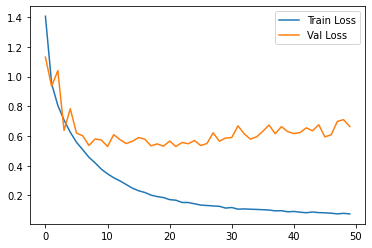

In [8]:
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

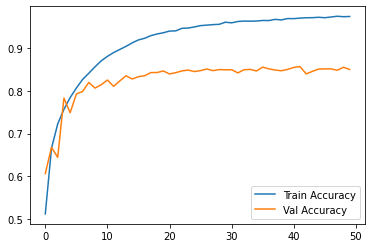

In [9]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

In [19]:
# Train with data augumentation
# reinitilaise and compile the model again else it will use the pre trained weights
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1, 
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator,validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 28s 17ms/step - loss: 1.9227 - accuracy: 0.3755 - val_loss: 1.2658 - val_accuracy: 0.5583
Epoch 2/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.1464 - accuracy: 0.5943 - val_loss: 1.0618 - val_accuracy: 0.6497
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.9678 - accuracy: 0.6666 - val_loss: 0.8597 - val_accuracy: 0.7104
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8633 - accuracy: 0.7007 - val_loss: 0.8027 - val_accuracy: 0.7282
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7928 - accuracy: 0.7299 - val_loss: 0.8570 - val_accuracy: 0.7221
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7342 - accuracy: 0.7489 - val_loss: 0.8700 - val_accuracy: 0.7076
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6662 - accuracy: 0.7743 - val_loss: 0.6334 -

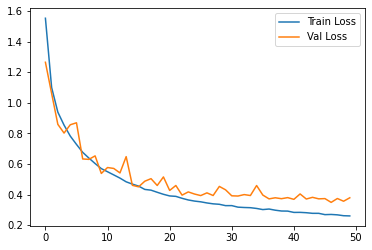

In [20]:
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

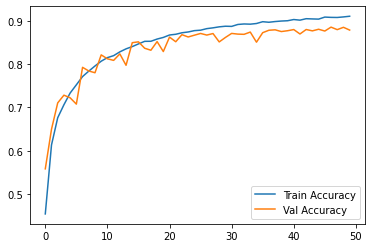

In [21]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

Confusion matrix, without normalization
[[872   9  35   5  15   2  12   4  24  22]
 [  2 940   3   0   0   0   2   0   8  45]
 [ 22   0 816  22  40  37  50   6   2   5]
 [  8   1  26 751  29  91  71   7   3  13]
 [  2   0  19  20 886  14  51   7   1   0]
 [  4   2  16  84  21 821  39   9   1   3]
 [  4   1  10  14   3   5 962   0   1   0]
 [  8   1  13  21  42  30   9 868   2   6]
 [ 35  11   4   4   3   1   7   0 920  15]
 [  6  28   0   3   2   1   4   1   8 947]]


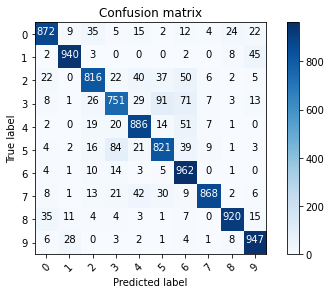

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

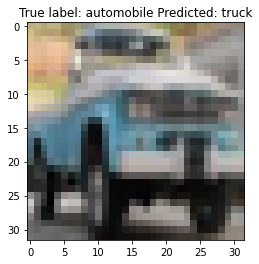

In [32]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));